In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, normaltest
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

from dataset import load_data, concat_by_features

In [2]:
train, test = load_data()
all_data = concat_by_features(train, test)

In [3]:
print(train.shape)
print(test.shape)
print(all_data.shape)

(1460, 81)
(1459, 80)
(2919, 79)


In [4]:
where_lot_frontage_not_null = np.logical_not(all_data["LotFrontage"].isnull())
lot_area = all_data.loc[where_lot_frontage_not_null, "LotArea"]
lot_frontage = all_data.loc[where_lot_frontage_not_null, "LotFrontage"]

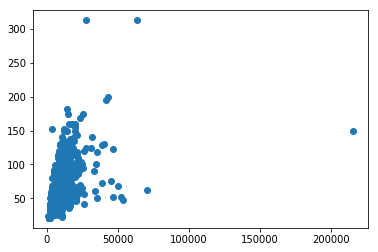

In [5]:
plt.scatter(lot_area, lot_frontage)

In [6]:
t = (lot_area <= 25000) & (lot_frontage <= 150)
p = np.polyfit(x=lot_area[t], y=lot_frontage[t], deg=1)

In [7]:
where_lot_frontage_is_null = all_data['LotFrontage'].isnull()
all_data.loc[where_lot_frontage_is_null, 'LotFrontage'] = np.polyval(p, all_data.loc[where_lot_frontage_is_null, 'LotArea'])

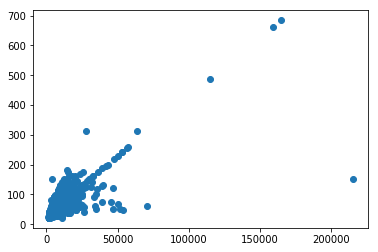

In [8]:
plt.scatter(all_data['LotArea'], all_data['LotFrontage'])

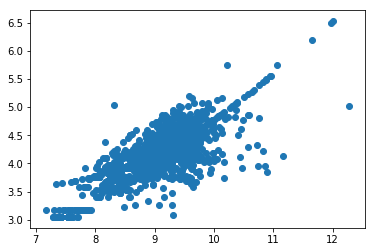

In [9]:
plt.scatter(np.log(all_data['LotArea']), np.log(all_data['LotFrontage']))

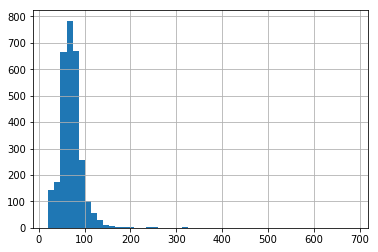

In [10]:
all_data['LotFrontage'].hist(bins=50)

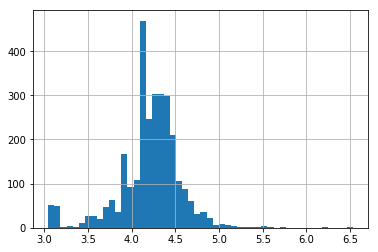

In [11]:
np.log(all_data['LotFrontage']).hist(bins=50)

In [13]:
lot_frontage = all_data['LotFrontage']
log_lot_frontage = np.log(lot_frontage)
print("Statistics=%.3f, p=%.5f, skew=%.5f, kurtosis=%.5f" % normaltest(log_lot_frontage), skew(log_lot_frontage), kurtosis(log_lot_frontage))
print("Statistics=%.3f, p=%.5f, skew=%.5f, kurtosis=%.5f" % normaltest(lot_frontage), skew(lot_frontage), kurtosis(lot_frontage))

lot_area = all_data['LotArea']
log_lot_area = np.log(lot_area)
print("Statistics=%.3f, p=%.5f, skew=%.5f, kurtosis=%.5f" % normaltest(log_lot_area), skew(log_lot_area), kurtosis(log_lot_area))
print("Statistics=%.3f, p=%.5f, skew=%.5f, kurtosis=%.5f" % normaltest(lot_area), skew(lot_area), kurtosis(lot_area))

SyntaxError: invalid syntax (<ipython-input-13-7c32db66b124>, line 3)

In [ ]:
qqplot(all_data['LotFrontage'], line='s')
pyplot.show()

In [ ]:
qqplot(np.log(all_data['LotFrontage']), line='s')
pyplot.show()